# Proyecto Fin de Máster (PFM) 

#### En el presente script se desarrollará el análisis estadístico y predictivo del rendimiento del R.Club Celta de Vigo tanto a nivel de equipo así como de determinados jugadores seleccionados en función de la distancia y altitud del equipo rival

##### Se elaborará y/o empleará:
 * Un modelo de IA no supervisado para segmentar los distintos equipos en función de las variables distancia y altitud
 * Análisis estadístico a nivel de Equipo
 * Análisis estádistico de determinados jugadores
 * Empleo de un modelo predictivo supervisado para predecir el rendimiento de determinados jugadores.


Por Alejandro Casares


In [51]:
#Librerias usadas:
import os
import pandas as pd
import numpy as np
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.patches import Arc
import seaborn as sns

import xml.etree.ElementTree as ET
from operator import itemgetter

In [52]:
Equipos = pd.read_excel('Equipos_Liga_Santander_202021.xlsx')

In [53]:
Equipos.head()

,Equipo,Nombre Completo,Abrebiatura,Estadio,Latitud,Latitud_N,Longitud,Longitud_N,Altitud,Distancia
0,Alavés,Deportivo Alavés S.A.D.,ALV,Mendizorroza,42°50′14″N,42.837222,2°41′17″O,-2.688056,517,656
1,Athletic,Athletic Club,ATH,San Mamés,43°15′51″N,43.264167,2°56′58″O,-2.949444,54,610
2,Atlético,Club Atlético de Madrid,ATM,Wanda Metropolitano,40°26′10″N,40.436111,3°35′58″O,-3.599444,664,677
3,Barcelona,Fútbol Club Barcelona,FCB,Camp Nou,41°22′51″N,41.380833,2°07′21″E,2.122500,190,1141
4,Betis,Real Betis Balompié,BET,Benito Villamarín,37°21′23″N,37.356389,5°58′54″O,-5.981667,11,726


### Clustering

In [54]:
# Escalar las variables Altitud y Distancia
Equipos['Altitud_std'] = Equipos['Altitud']
Equipos['Distancia_std'] = Equipos['Distancia']

Equipos[['Altitud_std', 'Distancia_std']] = StandardScaler().fit_transform(Equipos[['Altitud', 'Distancia']])

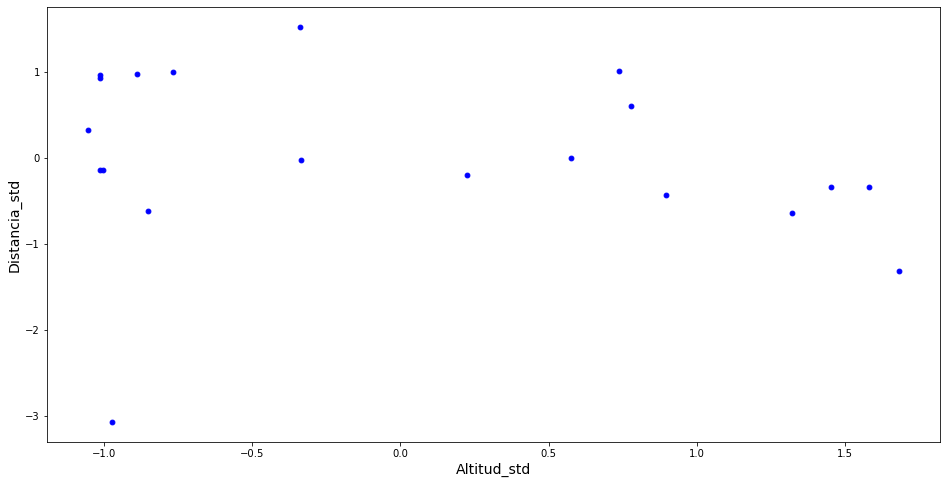

In [55]:
# Visualizamos los datos
X3 = Equipos[['Altitud_std', 'Distancia_std']].values
plt.figure(figsize=(16, 8))
plt.scatter(X3[:, 0], X3[:, 1], c=None, s=23, color='blue')
plt.xlabel("Altitud_std", fontsize=14)
plt.ylabel("Distancia_std", fontsize=14, rotation=90)
plt.show()

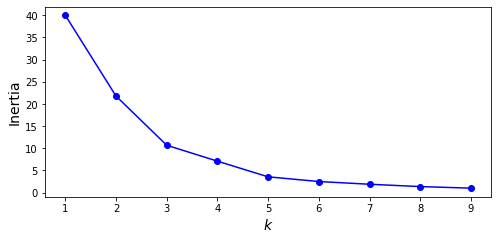

In [56]:
#Obtención del númeor de clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X3)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [57]:
def Exec_KMeans(k, X):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    print("Centros de los clusters: ", kmeans.cluster_centers_)
    
    plt.figure(figsize=(16, 6))
    cl = ['red', 'green', 'blue', 'black', 'yellow']
    assign = []
    for row in y_pred:
        assign.append(cl[row])
        
    plt.scatter(X[:,0], X[:,1], c=assign, s=70)
    
    plt.show()
    
    return y_pred

Centros de los clusters:  [[ 1.02791192 -0.18661329]
 [-0.80448565  1.07380444]
 [-0.85131956 -0.12311775]
 [-0.97218125 -3.07391382]]


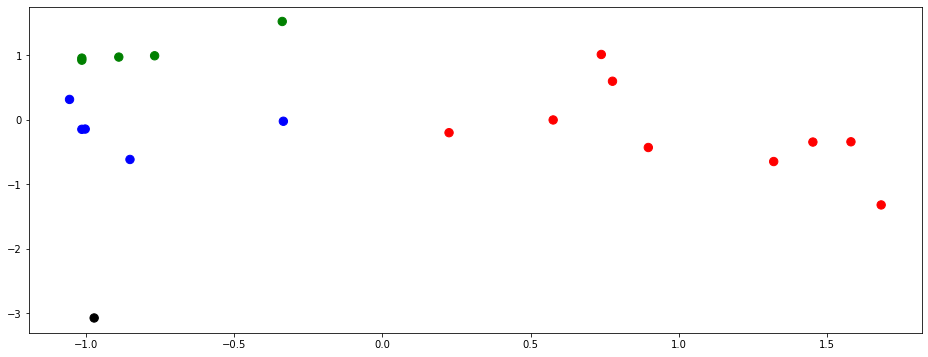

In [58]:
# Ejecutamos KMeans con el número de clusters (K) que hayas elegido y guardalo en una variable 'Cluster'
# en el dataset original (dt, si es tu caso)
selectedK = 4
y_pred = Exec_KMeans(selectedK, X3)

Centros de los clusters:  [[ 1.02791192 -0.18661329]
 [-0.80448565  1.07380444]
 [-0.85131956 -0.12311775]
 [-0.97218125 -3.07391382]]


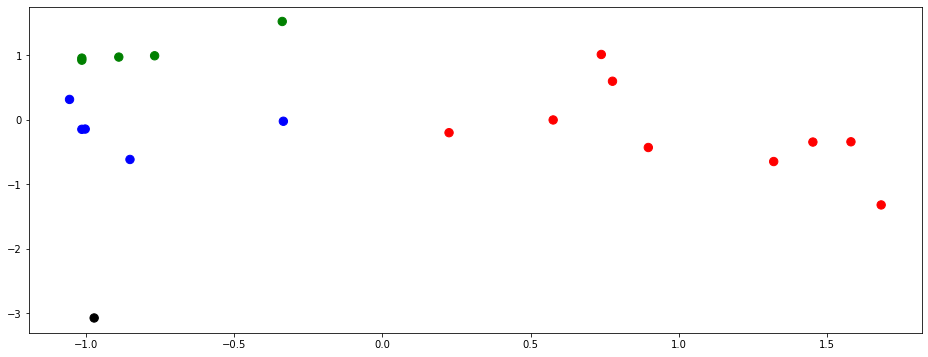

,Equipo,Nombre Completo,Abrebiatura,Estadio,Latitud,Latitud_N,Longitud,Longitud_N,Altitud,Distancia,Altitud_std,Distancia_std,Cluster
0,Alavés,Deportivo Alavés S.A.D.,ALV,Mendizorroza,42°50′14″N,42.837222,2°41′17″O,-2.688056,517,656,0.897398,-0.430207,0
1,Athletic,Athletic Club,ATH,San Mamés,43°15′51″N,43.264167,2°56′58″O,-2.949444,54,610,-0.851320,-0.615589,2
2,Atlético,Club Atlético de Madrid,ATM,Wanda Metropolitano,40°26′10″N,40.436111,3°35′58″O,-3.599444,664,677,1.452606,-0.345576,0
3,Barcelona,Fútbol Club Barcelona,FCB,Camp Nou,41°22′51″N,41.380833,2°07′21″E,2.122500,190,1141,-0.337657,1.524363,1
4,Betis,Real Betis Balompié,BET,Benito Villamarín,37°21′23″N,37.356389,5°58′54″O,-5.981667,11,726,-1.013727,-0.148104,2


In [59]:
Equipos['Cluster'] = Exec_KMeans(selectedK, X3)
Equipos.head()

In [60]:
print("Cluster 0")
print("La media de Altitud es", round(Equipos[Equipos['Cluster']==0]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==0]['Distancia'].mean(), 2))
print("-----------")
print("Cluster 1")
print("La media de Altitud es", round(Equipos[Equipos['Cluster']==1]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==1]['Distancia'].mean(), 2))
print("-----------")
print("Cluster 2")
print("La media de Altitud es ", round(Equipos[Equipos['Cluster']==2]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==2]['Distancia'].mean(), 2))
("-----------")
print("Cluster 3")
print("La media de Altitud es ", round(Equipos[Equipos['Cluster']==3]['Altitud'].mean(), 2))
print("La media de Distancia es ", round(Equipos[Equipos['Cluster']==3]['Distancia'].mean(), 2))

Cluster 0
La media de Altitud es 551.56
La media de Distancia es  716.44
-----------
Cluster 1
La media de Altitud es 66.4
La media de Distancia es  1029.2
-----------
Cluster 2
La media de Altitud es  54.0
La media de Distancia es  732.2
Cluster 3
La media de Altitud es  22.0
La media de Distancia es  0.0


In [81]:
#Cargamos un fichero Excel que contiene los resultados del Celta de Viga cada una de las jornadas de La Liga
Jornadas = pd.read_excel('Data/jornadas.xlsx')

In [82]:
#Unimos los dos documentos mediante el campo Equipo:
Jornadas_2 = pd.merge(Jornadas, Equipos, left_on='Rival', right_on='Equipo')

In [83]:
Jornadas.shape

(38, 19)

In [84]:
Jornadas_2.shape

(38, 32)

In [85]:
Jornadas_2.head(2)

,Jornada,Hora,Día,Fecha,Rival,Resultado,Lugar,Marcador,Equipo_x,Nombre Completo_x,...,Estadio_y,Latitud_y,Latitud_N,Longitud_y,Longitud_N,Altitud_y,Distancia_y,Altitud_std_y,Distancia_std_y,Cluster
0,J1,16:00:00,S,2020-09-12,Eibar,Empate,Fuera,0:0,Eibar,Sociedad Deportiva Eibar S.A.D.,...,Ipurúa,43°10′54″N,43.181667,2°28′33″O,-2.475833,339,713,0.225105,-0.200495,0
1,J2,18:30:00,D,2021-01-24,Eibar,Empate,Casa,1:1,Eibar,Sociedad Deportiva Eibar S.A.D.,...,Ipurúa,43°10′54″N,43.181667,2°28′33″O,-2.475833,339,713,0.225105,-0.200495,0


In [39]:
#Vemos que la unión ha sido correcta, se mantiene el número de registros, pero aumentan los atributos

#Ahora tenemos los resultados de cada jornada junto con información del equipo rival, incluido su cluster asignado

### Procedemos a la carga de los datos proporcionados por Opta
(Previamente tratados en R)

In [86]:
#Nos aseguramos estar en la carpeta adecuada:
os.getcwd()

'/Users/alejandrocasares/Desktop/02_Master/M12_PFM/PFM2'

In [87]:
datos = pd.DataFrame([],[])
for i in np.arange(1,39):    
    temporal = pd.read_csv(('Data/J'+str(i)+'.csv'),sep=';')
    temporal['Jornada'] = 'J'+str(i)
    datos = pd.concat([datos,temporal])

In [88]:
datos.head()

,player_id,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,...,289,67,381,436,187,313,300,330,329,245
0,100868.0,2210429275,593,1,2,66,8,176,0,25.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100868.0,2210344463,234,12,1,26,31,176,1,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100868.0,2210469203,792,1,2,91,46,176,1,12.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100868.0,2210399159,461,49,2,50,25,176,1,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100868.0,2210336175,179,1,1,21,18,176,1,24.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
datos.shape

(71344, 269)

In [90]:
#Cargamos un fichero que contiene la descripción de los distintos tipos de eventos de Opta.
#De esta forma trabajaremos sobre descriptivos en texto en lugar de códigos de eventos para facilitar el seguimiento
# y comprensión del trabajo:
descriptivos_f24 = pd.read_excel('Data/f24_type_id.xlsx',sheet_name="Hoja1")

In [91]:
descriptivos_f24.head(5)

,type_id,Description,Descripción
0,1,Pass,Pase
1,2,Offside Pass,Pase en fuera de juego
2,3,Take On,Regate
3,4,Foul,Falta
4,5,Out,Fuera


In [92]:
#Unimos nuestro DF de datos con los descriptivos:
datos = pd.merge(datos, descriptivos_f24, how='left', on='type_id')

In [93]:
datos.shape

(71344, 271)

In [94]:
datos.head(3)

,player_id,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,...,381,436,187,313,300,330,329,245,Description,Descripción
0,100868.0,2210429275,593,1,2,66,8,176,0,25.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pase
1,100868.0,2210344463,234,12,1,26,31,176,1,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clearance,Despeje
2,100868.0,2210469203,792,1,2,91,46,176,1,12.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pase


In [95]:
datos_all = pd.merge(datos, Jornadas_2, how='left', on='Jornada')

In [96]:
#Comprobamos la estructura del dataframe para asegurarnos de que la unión ha sido correcta:
datos_all.shape

(71344, 302)

In [97]:
datos_all.head(3)

,player_id,id,event_id,type_id,period_id,min,sec,team_id,outcome,x,...,Estadio_y,Latitud_y,Latitud_N,Longitud_y,Longitud_N,Altitud_y,Distancia_y,Altitud_std_y,Distancia_std_y,Cluster
0,100868.0,2210429275,593,1,2,66,8,176,0,25.9,...,Ipurúa,43°10′54″N,43.181667,2°28′33″O,-2.475833,339,713,0.225105,-0.200495,0
1,100868.0,2210344463,234,12,1,26,31,176,1,23.6,...,Ipurúa,43°10′54″N,43.181667,2°28′33″O,-2.475833,339,713,0.225105,-0.200495,0
2,100868.0,2210469203,792,1,2,91,46,176,1,12.3,...,Ipurúa,43°10′54″N,43.181667,2°28′33″O,-2.475833,339,713,0.225105,-0.200495,0


# Análisis de resultados a nivel de equipo

In [31]:
# Goles:

In [100]:
mask = ((datos_all['type_id']==16) 
      & (datos_all['team_id'] == 176))

datos_all[mask][['Cluster','Lugar']].value_counts()

Cluster  Lugar
0        Casa     13
2        Fuera    12
0        Fuera    11
1        Fuera     8
         Casa      8
2        Casa      5
dtype: int64

In [101]:
#Goles encajados
mask = ((datos_all['type_id']==16) 
      & (datos_all['team_id'] != 176))

datos_all[mask][['Cluster','Lugar']].value_counts()

Cluster  Lugar
0        Casa     15
         Fuera    12
2        Casa      9
         Fuera     8
1        Fuera     8
         Casa      8
dtype: int64

In [104]:
#Marcador
mask = ((datos_all['type_id']==32) 
      & (datos_all['team_id'] == 176))

datos_all[mask][['Cluster','Resultado']].value_counts()

# REVISAR !!

Cluster  Resultado
0        Ganado       14
         Empate       14
2        Derrota      12
1        Ganado       10
0        Derrota       8
1        Derrota       6
2        Ganado        4
         Empate        4
1        Empate        4
dtype: int64

In [105]:
# Faltas recibidas:

In [106]:
mask = ((datos_all['type_id']==4) 
      & (datos_all['team_id'] == 176))

datos_all[mask][['Cluster']].value_counts()

Cluster
0          546
1          340
2          310
dtype: int64

In [107]:
#Faltas realizadas:

In [108]:
mask = ((datos_all['type_id']==4) 
      & (datos_all['team_id'] != 176))

datos_all[mask][['Cluster']].value_counts()

Cluster
0          550
1          330
2          327
dtype: int64

In [109]:
#Tarjetas recibidas:

In [110]:
mask = ((datos_all['type_id']==17) 
      & (datos_all['team_id'] == 176))

datos_all[mask][['Cluster']].value_counts()

Cluster
0          62
2          33
1          25
dtype: int64

In [111]:
#Tarjetas sacadas al rival:

In [112]:
mask = ((datos_all['type_id']==17) 
      & (datos_all['team_id'] != 176))

datos_all[mask][['Cluster']].value_counts()

Cluster
0          50
1          31
2          28
dtype: int64

In [ ]:
### GRAFICAS

In [ ]:
g = sns.catplot(x='year', y='income', data=data, kind='bar', hue='geo_name', legend=True)
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

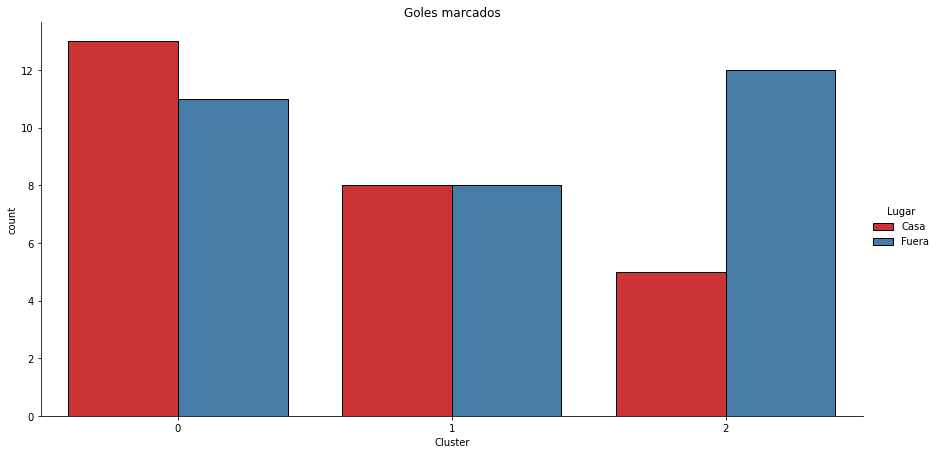

In [149]:
df_goles = datos_all[(datos_all['type_id']==16)& (datos_all['team_id'] == 176)]
g = sns_plot = sns.catplot(x='Cluster', data=df_goles, kind="count", height=6, aspect=2, edgecolor='black', 
                       hue = 'Lugar',palette="Set1", legend = True).set(title ='Goles marcados')